# Carga de Datos e Introduccion

In [26]:
# data analysis
import pandas as pd
import numpy as np
import random as rnd
import csv

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [27]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

train_df_aux = train_df.copy()
test_df_aux = test_df.copy()

# EDA

### Objetivo
Determinar quienes son fumadores

### Flujo de trabajo
1. **Comprendender el problema:** Realizar un analisis exploratorio EDA
2. **Preprocesamiento de datos:** En base a lo descubierto en el EDA
3. **Seleccionar modelos candidatos:** Considerando que es un problema de clasificacion binaria
4. **Optimizacion de caracteristicas**
5. **Entrenamiento y ajuste de hiperparametros**


1. **¿Qué características están disponibles en el conjunto de datos?**

- id
- age
- height(cm)
- weight(kg)
- waist(cm)
- eyesight(left)
- eyesight(right)
- hearing(left)
- hearing(right)
- systolic
- relaxation
- fasting blood sugar
- Cholesterol
- triglyceride
- HDL
- LDL
- hemoglobin
- Urine protein
- serum creatinine
- AST
- ALT
- Gtp
- dental caries

2. **¿Que caracteristicas son categoricas?**

    2.1. **Subcategoria:** Nominales

    - id
    - Urine protein (presence or absence of protein in urine - likely 0 or 1)
    - Dental caries (presence or absence of cavities - likely 0 or 1)

    2.2 **Subcategoria:** Binarias (possible interpretations based on the data sample)

    - hearing(left) (possibly normal or impaired hearing - 1 or 2)
    - hearing(right) (possibly normal or impaired hearing - 1 or 2)

3. **¿Que caracteristicas son numericas?**

    3.1. **Subcategoria:** Discretas (whole numbers representing counts)

    - age

    3.2. **Subcategoria:** Continuo (can take any value within a range)

    - height(cm)
    - weight(kg)
    - waist(cm)
    - eyesight(left)
    - eyesight(right)
    - systolic
    - relaxation
    - fasting blood sugar
    - Cholesterol
    - triglyceride
    - HDL
    - LDL
    - hemoglobin
    - serum creatinine
    - AST
    - ALT
    - Gtp


In [28]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [29]:
train_df.describe()
test_df.describe()

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
count,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,...,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000,106171.000000
mean,212341.000000,44.426538,165.221322,67.125618,82.999892,1.004776,0.999483,1.024216,1.023980,122.475403,...,127.406203,55.922286,114.597404,14.793354,1.072798,0.892463,25.559616,26.565427,36.086888,0.195458
std,30649.072052,11.897138,8.837065,12.586569,8.946584,0.397690,0.385752,0.153719,0.152988,12.765542,...,66.352488,14.000552,26.943401,1.434296,0.340818,0.179927,9.504442,17.944195,30.928138,0.396555
min,159256.000000,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,...,8.000000,18.000000,1.000000,5.000000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000
25%,185798.500000,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,...,77.000000,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000
50%,212341.000000,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,...,114.000000,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000
75%,238883.500000,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,...,164.000000,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,33.000000,44.000000,0.000000
max,265426.000000,85.000000,190.000000,130.000000,127.700000,9.900000,9.900000,2.000000,2.000000,213.000000,...,548.000000,148.000000,1220.000000,21.100000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000


In [30]:
train_df.nunique()
test_df.nunique()

id                     106171
age                        18
height(cm)                 16
weight(kg)                 26
waist(cm)                 508
eyesight(left)             20
eyesight(right)            18
hearing(left)               2
hearing(right)              2
systolic                  114
relaxation                 78
fasting blood sugar       224
Cholesterol               227
triglyceride              392
HDL                       106
LDL                       219
hemoglobin                132
Urine protein               6
serum creatinine           26
AST                       135
ALT                       174
Gtp                       332
dental caries               2
dtype: int64

Se observa que algunos datos a pesar de ser continuos, tienen muy pocos valores que son realmente usados en su rango, por ejemplo, la altura se mueve en un rango de 135cm - 190cm, es bastante amplio, pero realmente solo hay 14 valores unicos. Posiblemente haya una posibilidad de discretazion en los datos, las caracteristicas son:

- Edad
- Altura
- Peso

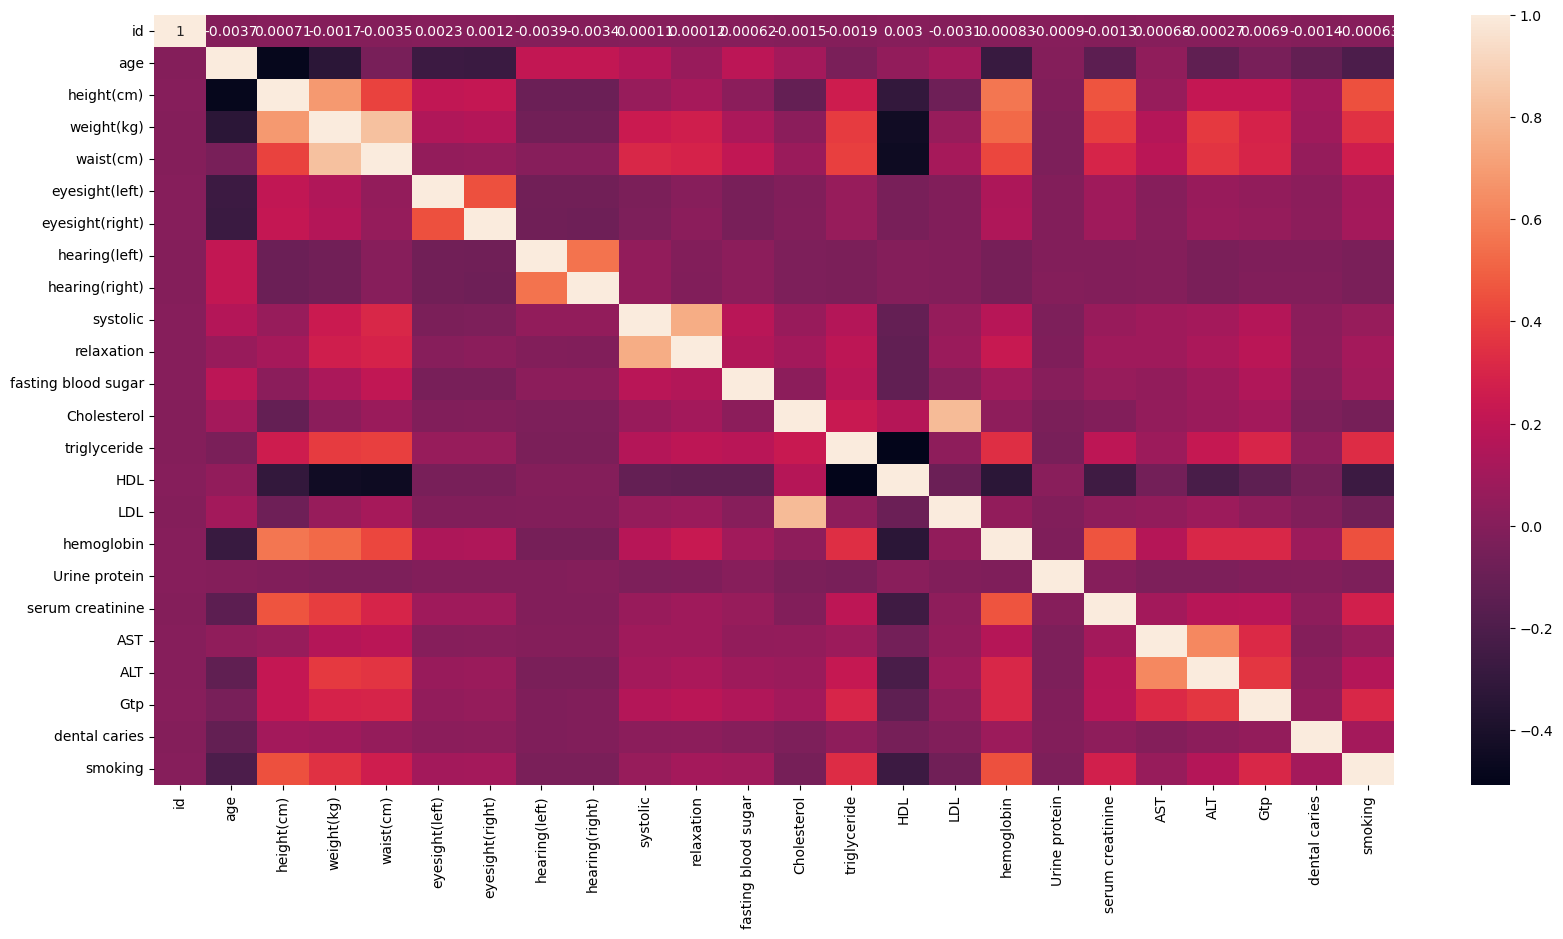

In [31]:
#test_df.corr()
#train_df.corr()

sns.heatmap(train_df.corr(), annot=True)
plt.rcParams['figure.figsize'] = (20, 10)
plt.show()

count    159256.000000
mean         44.306626
std          11.842286
min          20.000000
25%          40.000000
50%          40.000000
75%          55.000000
max          85.000000
Name: age, dtype: float64


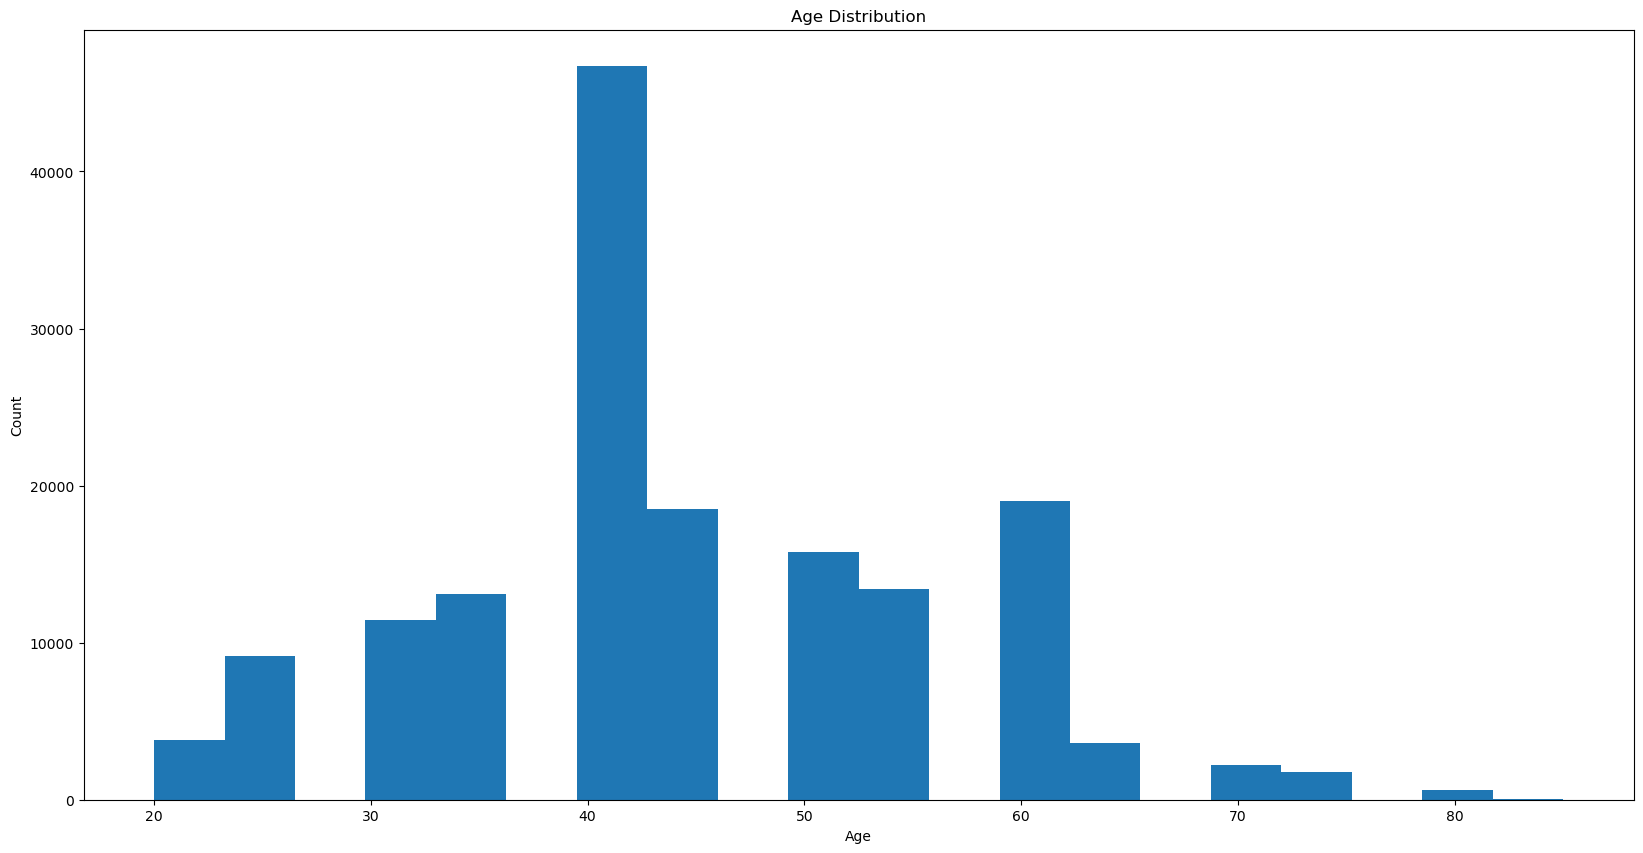

In [32]:
print(train_df['age'].describe())

plt.hist(train_df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

              age   smoking
age      1.000000 -0.206033
smoking -0.206033  1.000000


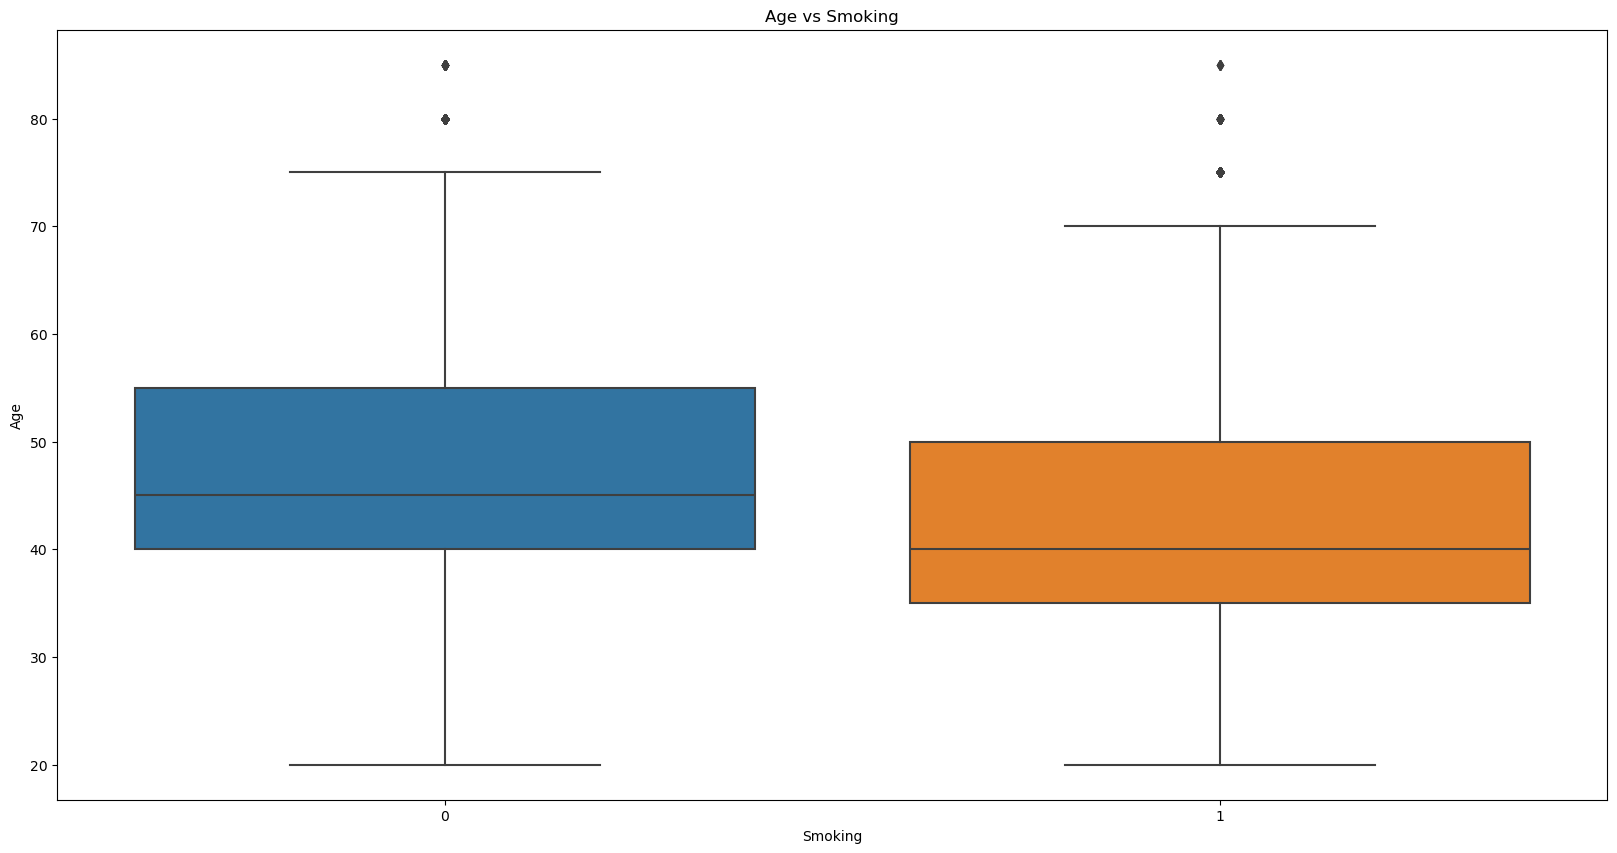

In [33]:
correlation_matrix = train_df[['age', 'smoking']].corr()

print(correlation_matrix)

sns.boxplot(x='smoking', y='age', data=train_df)
plt.xlabel('Smoking')
plt.ylabel('Age')
plt.title('Age vs Smoking')
plt.show()

# Optimizacion de caracteristicas



#### Correcciones
1. **Remove "id" Column:** no es necesaria
2. **Discretizar caracteristicas:** edad, altura y peso

#### Caracteristicas a crear
1. **Body Mass Index (BMI):** ``weight(kg) / (height(cm) / 100)^2``
2. **Pulse Pressure:** ``systolic - relaxation``
3. **LDL/HDL Ratio:** ``LDL / HDL``

## Remover id

In [34]:
train_df = train_df.drop(['id'], axis=1)
test_df = test_df.drop(['id'], axis=1)

## Discretizar caracteristicas

Se usaran las mismas consideraciones para los 3 datos a discretizar, pues sus caracteristicas son lo suficientemente similares

- **Opcion 1:(Posible division por joven, adulto, adulto mayor)** Dividir los datos en cohortes y asignarle a cada uno un valor entero, de esta forma los datos se discriminaran por grupos de altura
- **Opcion 2:** Uso de corte por percentiles para simplicidad de analisis
- **Opcion 3:(Pendiente a revision)** Uso de arboles de decision que tendran en cuenta la relacion con la variable objetivo

### Edad

Los valores de altura que van desde 130cm hasta 190cm, son datos numericos continuos, el objetivo es explorar de que manera podria el modelo aprovechar mejor estos datos.

In [35]:
cuartiles = train_df['age'].quantile([0.25, 0.5, 0.75])

def age_group(age):
    if age <= cuartiles[0.25]:
        return 1
    elif age <= cuartiles[0.5]:
        return 2
    elif age <= cuartiles[0.75]:
        return 3
    else:
        return 4
    
train_df['age'] = train_df['age'].apply(age_group)
test_df['age'] = test_df['age'].apply(age_group)

### Altura

In [36]:
percentile = train_df['height(cm)'].quantile(np.linspace(0, 1, 4))

def height_percentile(height):
    for i, perc in enumerate(percentile):
        if height <= perc:
            return i
    return 4

train_df['height(cm)'] = train_df['height(cm)'].apply(height_percentile)
test_df['height(cm)'] = test_df['height(cm)'].apply(height_percentile)

### Peso

In [37]:
percentile = train_df['weight(kg)'].quantile(np.linspace(0, 1, 4))

def weight_percentile(weight):
    for i, perc in enumerate(percentile):
        if weight <= perc:
            return i
    return 4

train_df['weight(kg)'] = train_df['weight(kg)'].apply(weight_percentile)
test_df['weight(kg)'] = test_df['weight(kg)'].apply(weight_percentile)

## Crear Caracteristicas

### BMI

In [38]:
train_df_aux_m = train_df_aux.copy()
train_df_aux_m['height(m)'] = train_df_aux_m['height(cm)'] / 100
train_df['BMI'] = train_df_aux_m['weight(kg)'] / (train_df_aux_m['height(m)'] ** 2)

# Filtrar los valores de BMI por debajo de 12 y convertirlos en 12
train_df.loc[train_df['BMI'] < 12, 'BMI'] = 12

### Pulse Pressure

In [39]:
train_df['pulse pressure'] = train_df_aux['systolic'] - train_df_aux['relaxation']

# Reasignar los valores de 'pulse pressure' fuera del rango al valor límite del rango
train_df['pulse pressure'] = train_df['pulse pressure'].clip(lower = 0, upper = 150)

### LDL/HDL Ratio: ``LDL / HDL``

In [40]:
train_df['LDL/HDL'] = train_df_aux['LDL'] / train_df_aux['HDL']

train_df['LDL/HDL'] = train_df['LDL/HDL'].clip(lower = 0.1, upper = 10)

## Normalizacion de Caracteristicas

In [42]:
toAnalyze = train_df.copy()

categorical_columns = ['hearing(left)', 'hearing(right)', 'dental caries', 'smoking', 'age', 'height(cm)', 'weight(kg)']
numerical_columns = [col for col in toAnalyze.columns if col not in categorical_columns]

scaler = MinMaxScaler()
toAnalyze[numerical_columns] = scaler.fit_transform(toAnalyze[numerical_columns])

toAnalyze = toAnalyze.round(4)

toAnalyze.to_csv('toAnalyze.csv', index=False)